In [1]:
import diffrax
import jax
import jax.numpy as jnp
import numpy as np
from jax import random
import matplotlib.pyplot as plt
import lineax as lx
import optimistix as opt

from pde_opt.numerics.domains import Domain
from pde_opt.numerics.equations import CahnHilliard2DPeriodic, AllenCahn2DPeriodic
from pde_opt.numerics.solvers import SemiImplicitFourierSpectral

In [ ]:
Nx, Ny = 256, 1
Lx = 0.01 * Nx
Ly = 0.01 * Ny
domain = Domain((Nx, Ny), ((-Lx / 2, Lx / 2), (-Ly / 2, Ly / 2)), "dimensionless")

t_start = 0.0
t_final = 0.1
dt = 0.000005

ts_save = jnp.linspace(t_start, t_final, 200)

kappa = 0.002

In [11]:
eq = CahnHilliard2DPeriodic(
    domain,
    kappa,
    lambda c: c**3 - c,
    lambda c: jnp.ones_like(c),
    derivs="fd"
)

solver = SemiImplicitFourierSpectral(0.5, eq.fourier_symbol, eq.fft, eq.ifft)

In [ ]:
u0 = jnp.ones((Nx, Ny))
u0 = u0.at[:Nx//2, :].set(-1.0)

In [ ]:
plt.plot(u0.squeeze())

In [ ]:
solution = diffrax.diffeqsolve(
    diffrax.ODETerm(jax.jit(lambda t, y, args: eq.rhs(y, t))),
    solver,
    t0=t_start,
    t1=t_final,
    dt0=dt,
    y0=u0,
    # stepsize_controller=diffrax.PIDController(rtol=1e-3, atol=1e-3),
    saveat=diffrax.SaveAt(ts=ts_save),
    max_steps=1000000,
)

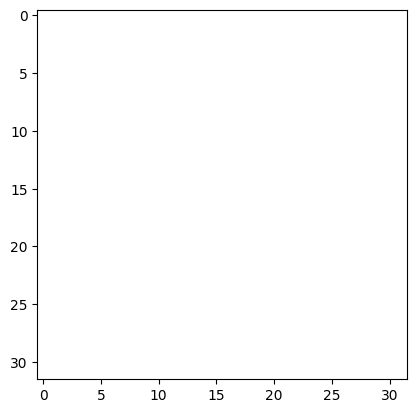

In [ ]:
plt.imshow(solution.ys[-1].squeeze())

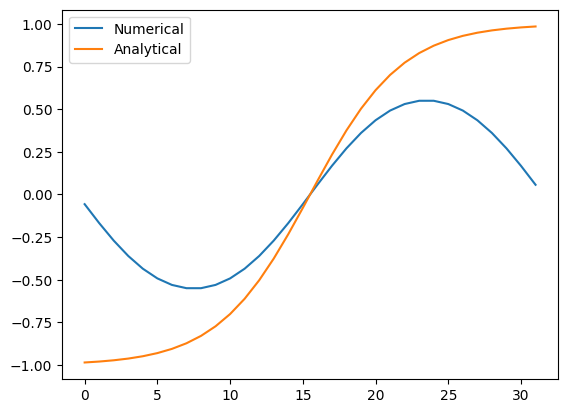

In [18]:
phi_analytic = np.tanh(domain.axes()[0] / np.sqrt(2 * kappa))
plt.plot(solution.ys[-1,:,26].squeeze(), label="Numerical")
plt.plot(phi_analytic, label="Analytical")
plt.legend()
plt.show()

In [101]:
eq = AllenCahn2DPeriodic(
    domain,
    kappa,
    lambda c: c**3 - c,
    lambda c: jnp.ones_like(c),
    derivs="fd"
)

solver = diffrax.Tsit5()

In [102]:
solution = diffrax.diffeqsolve(
    diffrax.ODETerm(jax.jit(lambda t, y, args: eq.rhs(y, t))),
    solver,
    t0=t_start,
    t1=t_final,
    dt0=dt,
    y0=u0,
    # stepsize_controller=diffrax.PIDController(rtol=1e-4, atol=1e-6),
    saveat=diffrax.SaveAt(ts=ts_save),
    max_steps=1000000,
)

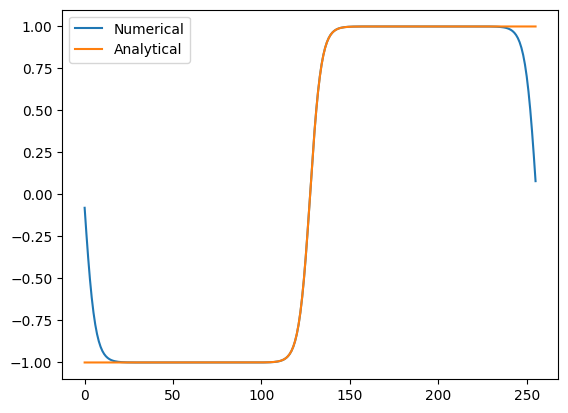

In [103]:
phi_analytic = np.tanh(domain.axes()[0] / np.sqrt(2 * kappa))
plt.plot(solution.ys[-1].squeeze(), label="Numerical")
plt.plot(phi_analytic, label="Analytical")
plt.legend()
plt.show()